# Market Rates API Example

In [17]:
signal_ocean_api_key = '' #replace with your subscription key

## Market Rates API
The Market Rates API retrieves available routes and market rates. First create connection towards
Market Rates API in order to find available routes by vessel class:

In [18]:
from signal_ocean import Connection
from signal_ocean.market_rates import MarketRatesAPI
from datetime import date

connection = Connection(api_key=signal_ocean_api_key)
mr_api = MarketRatesAPI(connection)

#### Get the available vessel classes
Retrieve the vessel classes for which we can get routes or market rates:

In [19]:
vessel_classes = mr_api.get_vessel_classes()
print(vessel_classes)

(VesselClass(id=60, vessel_type_id=6, from_size=70001, to_size=250000, name='VLGC', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=61, vessel_type_id=6, from_size=28001, to_size=70000, name='Midsize/LGC', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=62, vessel_type_id=6, from_size=10001, to_size=28000, name='Handy', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=63, vessel_type_id=6, from_size=0, to_size=10000, name='Small', vessel_type='LPG', defining_size='CubicSize', size='cbm'), VesselClass(id=69, vessel_type_id=3, from_size=220000, to_size=550000, name='VLOC', vessel_type='Dry', defining_size='DeadWeight', size='kt'), VesselClass(id=70, vessel_type_id=3, from_size=120000, to_size=219999, name='Capesize', vessel_type='Dry', defining_size='DeadWeight', size='kt'), VesselClass(id=72, vessel_type_id=3, from_size=85000, to_size=119999, name='Post Panamax Dry', vessel_type='Dry', defining_size='DeadWeight

#### Get routes for a vessel class
Based on the vessel classes that we got above we can request available routes for Aframax vessels

In [20]:
afra_vessel_class = next(vc for vc in vessel_classes if vc.name=='Aframax')
afra_routes = mr_api.get_routes(vessel_class_id=afra_vessel_class.id)
print(afra_routes)

(Route(id='R1', description='Afra - Med', unit='WS', vessel_class_id=86, is_clean=False), Route(id='R10', description='Afra - Indo_OZ', unit='WS', vessel_class_id=86, is_clean=False), Route(id='R13', description='Afra - USG_Med', unit='WS', vessel_class_id=86, is_clean=False), Route(id='R14', description='LR2 - AG', unit='WS', vessel_class_id=86, is_clean=True), Route(id='R2', description='Afra - Baltic', unit='WS', vessel_class_id=86, is_clean=False), Route(id='R3', description='Afra - UKCont', unit='WS', vessel_class_id=86, is_clean=False), Route(id='R4', description='Afra - Caribs', unit='WS', vessel_class_id=86, is_clean=False), Route(id='R42', description='Afra - PacRussia_China', unit='LS', vessel_class_id=86, is_clean=False), Route(id='R43', description='LR2 - Med_FarEast', unit='LS', vessel_class_id=86, is_clean=True), Route(id='R9', description='Afra - AG_FarEast', unit='WS', vessel_class_id=86, is_clean=False), Route(id='TC1', description='Afra - One Year TC Rate', unit='$/da

#### Get the market rates
Now we can request the market rate on a given date for one of the routes we got in previous step or
for all routes matching this vessel class

In [21]:
mr_api.get_market_rates(date(2020, 1, 2), route_id=afra_routes[0].id)
mr_api.get_market_rates(date(2020, 1, 2), vessel_class_id=afra_vessel_class.id)

(MarketRate(route_id='R1', rate_date='2020-01-02', rate_value=245.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R2', rate_date='2020-01-02', rate_value=175.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R3', rate_date='2020-01-02', rate_value=160.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R4', rate_date='2020-01-02', rate_value=400.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R13', rate_date='2020-01-02', rate_value=325.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R10', rate_date='2020-01-02', rate_value=215.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R9', rate_date='2020-01-02', rate_value=280.0, unit='WS', vessel_class_id=86),
 MarketRate(route_id='R42', rate_date='2020-01-02', rate_value=1363417.0, unit='LS', vessel_class_id=86),
 MarketRate(route_id='TC1', rate_date='2020-01-02', rate_value=25000.0, unit='LS', vessel_class_id=86))

We can also see how market rates evolve on a given route for a certain time period

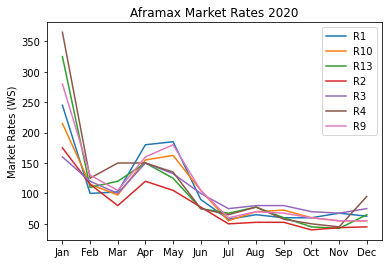

In [22]:
import matplotlib.pyplot as plt

dates = [date(2020, m, 1) for m in range(1,13)]
dates_str = [d.strftime("%b") for d in dates]

for r in afra_routes:
    rates = []
    for d in dates:
        rate = mr_api.get_market_rates(d, route_id=r.id)
        if rate and rate[0].unit == "WS":
            rates.append(rate[0].rate_value)
        else:
            break
    if rates:
        plt.plot(dates_str, rates, label=r.id)

plt.ylabel(f'Market Rates (WS)')
plt.title('Aframax Market Rates 2020')
plt.legend()
plt.show()